In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('performances.csv')
data['group'] = data['group'].apply(lambda x: x[-1])
data['mask'] = data['group'].apply(lambda x: x in ['2', '3'])
data = data[data['mask']==True]
del data['mask']
data.head()

,group,round,player,choice,attendance,score,ac_score
243,2,1,jugador4b,1,2,1,16
244,2,1,jugador3b,0,2,0,-6
245,2,1,jugador1b,0,2,0,-8
246,2,1,jugador5a,1,2,1,12
247,2,1,jugador5b,0,2,0,14


In [67]:
attendance = pd.DataFrame(data.groupby(['group', 'round'])['choice'].sum().reset_index())
attendance.columns = ['group', 'round', 'attendance']
attendance.head()

,group,round,attendance
0,2,1,2
1,2,2,2
2,2,3,5
3,2,4,4
4,2,5,3


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


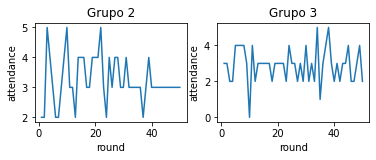

In [59]:
count=1
for key,grp in attendance.groupby('group'):
    plt.subplot(2,2,count)
    sns.lineplot('round', 'attendance', data=grp)
    plt.title("Grupo " + key)
    count+=1


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='round', ylabel='attendance'>

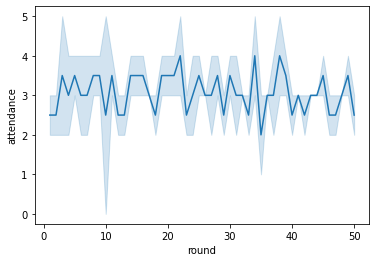

In [63]:
sns.lineplot('round','attendance',data=attendance)

In [68]:
scores = data.groupby('player')['score'].mean()
scores.head()

player
jugador1b   -0.266667
jugador1d    0.100000
jugador2d    0.280000
jugador3b   -0.120000
jugador3d    0.220000
Name: score, dtype: float64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

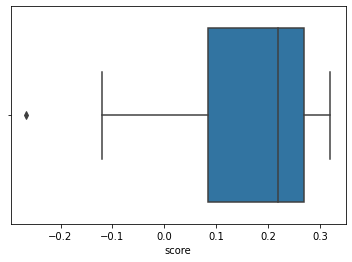

In [69]:
sns.boxplot(scores)